In [8]:
import pandas as pd;
import numpy as np;
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [9]:
df=pd.read_csv('waterPotability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [10]:
col=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
for i in col:
    df[i]=df[i].replace(0,np.NAN)
    mean=df[i].mean(skipna=True)
    df[i] = df[i].replace(np.NAN,mean)
df.head()
for i in col:
        df[i]=df[i].astype(int)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,204,20791,7,368,564,10,86,2,0
1,3,129,18630,6,333,592,15,56,4,0
2,8,224,19909,9,333,418,16,66,3,0
3,8,214,22018,8,356,363,18,100,4,0
4,9,181,17978,6,310,398,11,31,4,0


In [11]:
data= df.iloc[:,:-1]
outcomeData=df.iloc[:,-1]

In [12]:
data_train,data_test,outcomeData_train,outcomeData_test= train_test_split(data,outcomeData,random_state=0,test_size=0.5)
data_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2379,7,179,21065,7,377,571,12,85,3
2170,7,162,24642,7,330,414,11,73,3
3172,7,193,32251,6,337,572,18,57,4
1779,6,209,10120,9,333,410,7,101,4
2188,5,134,15979,9,366,418,12,57,3
...,...,...,...,...,...,...,...,...,...
835,7,183,17259,4,335,452,9,80,2
3264,5,239,20526,6,341,403,18,63,4
1653,6,191,15176,5,333,471,15,56,3
2607,7,233,23673,8,333,232,18,60,5


In [13]:
sc=StandardScaler()
data_train=sc.fit_transform(data_train)
data_test=sc.transform(data_test)
print(len(outcomeData_train))

1638


In [30]:
classifier =KNeighborsClassifier(n_neighbors=42,p=2,metric='euclidean')
classifier.fit(data_train,outcomeData_train)
y_pred=classifier.predict(data_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
cm=confusion_matrix(outcomeData_test,y_pred)
cm

array([[961,  66],
       [507, 104]])

In [33]:
accuracy_score(outcomeData_test,y_pred)
f1_score(outcomeData_test,y_pred,average='micro')


0.6501831501831502

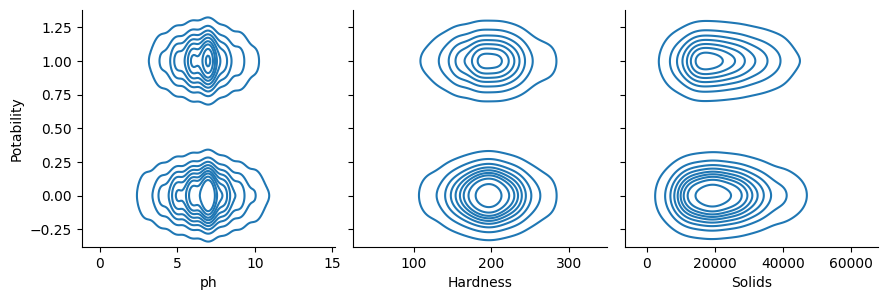

In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.pairplot(df, x_vars=['ph','Hardness','Solids'], 
             y_vars='Potability', height=3, aspect=1, kind='kde')
plt.show()

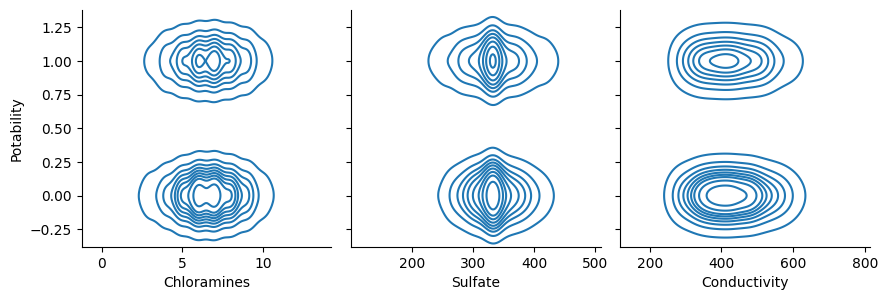

In [47]:
sns.pairplot(df, x_vars=['Chloramines','Sulfate','Conductivity'], 
             y_vars='Potability', height=3, aspect=1, kind='kde')
plt.show()